In [1]:
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
pl.rcParams["xtick.labelsize"] = "20"
pl.rcParams["ytick.labelsize"] = "20"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
def getstats(df, title):
    mean = df.values.mean()
    std = df.values.std()
    n = df.size
    print ("count: {0:6d}".format(n))
    print ("max:  {0:7d}".format(df.values.max()))
    print ("min:  {0:7d}".format(df.values.min()))
    print ("mean:    {0:5.2f}".format(mean))
    print ("median:  {0:3.2f}".format(df.median()[1]))
    print ("std:  {0:8.2f}".format(df.values.std()))    
    print ("quartiles: {0:.2f} {1:.2f}".format(df.quantile(q=0.25)[1], (df.quantile(q=0.75)[1])))
    #print(sp.stats.kstest(((df[1] - df[1].mean()) / df[1].std()).values, "norm"))
    print ("is it Gaussian?")
    print(sp.stats.anderson(df[1].values, "norm"))
    fig = pl.figure(figsize=(20,8))
    ax = fig.add_subplot(121)
    ax.set_xlim(0,100)
    ax.hist(df[1].values, normed=True)
    pl.fill_betweenx(ax.get_ylim(),
                     [mean - std, mean - std], [mean + std, mean + std], alpha=0.5)
    ax.plot([mean, mean], ax.get_ylim())
    ax.set_xlabel("grade (0-100)", fontsize=20)
    ax.set_ylabel("fraction of students", fontsize=20)
    ax.text(mean - 5, ax.get_ylim()[1] * 0.85, "mean = %.2f"%mean,
           rotation=90, fontsize=20)
    ax.set_title(title, fontsize=20)
    
    ax = fig.add_subplot(122)
    ax.set_xlim(0,100)
    ax.hist(df[1].values,  cumulative=True)
    pl.fill_betweenx(ax.get_ylim(),
                     [mean - std, mean - std], [mean + std, mean + std], alpha=0.5)
    ax.plot([mean, mean], ax.get_ylim())
    ax.set_xlabel("grade (0-100)", fontsize=20)
    ax.set_ylabel("number of students", fontsize=20)
    ax.text(mean - 5, ax.get_ylim()[1] * 0.85, "mean = %.2f"%mean,
           rotation=90, fontsize=20)
    ax.set_title(title + ", cumulative", fontsize=20)

    return mean, std, n

In [82]:
mor = pd.read_csv("midtermsMorning/gradesDone.csv", header=None)
eve = pd.read_csv("midtermsEvening/gradesDone.csv", header=None)


count:     49
max:       99
min:        5
mean:    45.67
median:  42.00
std:     21.84
quartiles: 29.00 59.00
is it Gaussian?
AndersonResult(statistic=0.6292650915267473, critical_values=array([0.538, 0.612, 0.735, 0.857, 1.019]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


//anaconda/envs/GEOP/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


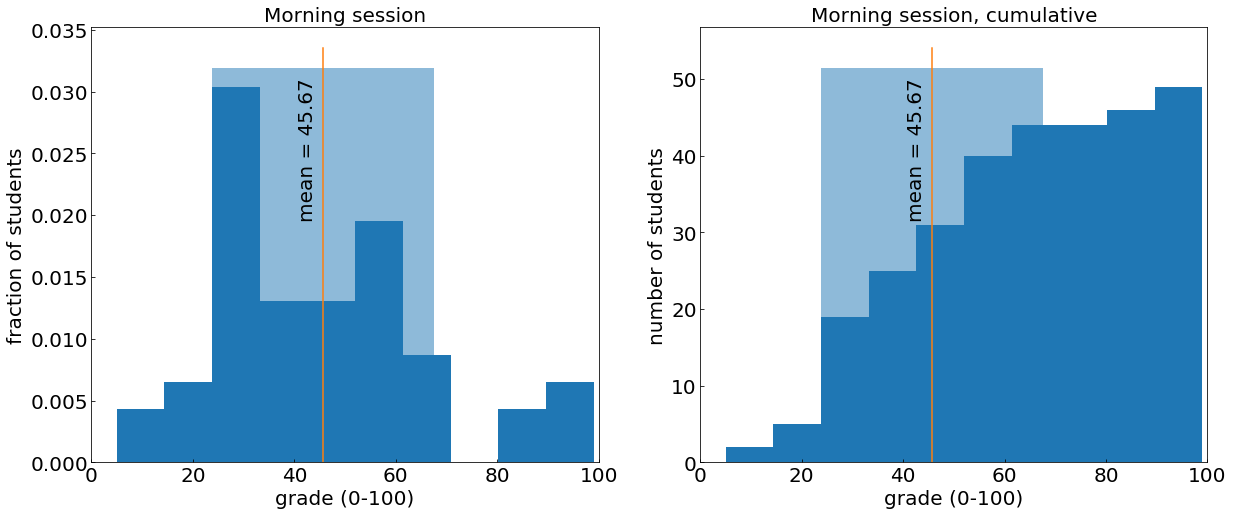

In [83]:
mm, ms, mn = getstats(mor[[1]], "Morning session")

count:     51
max:       94
min:        2
mean:    47.37
median:  39.00
std:     25.11
quartiles: 26.50 68.00
is it Gaussian?
AndersonResult(statistic=1.0767416114531585, critical_values=array([0.539, 0.614, 0.736, 0.859, 1.022]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


//anaconda/envs/GEOP/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


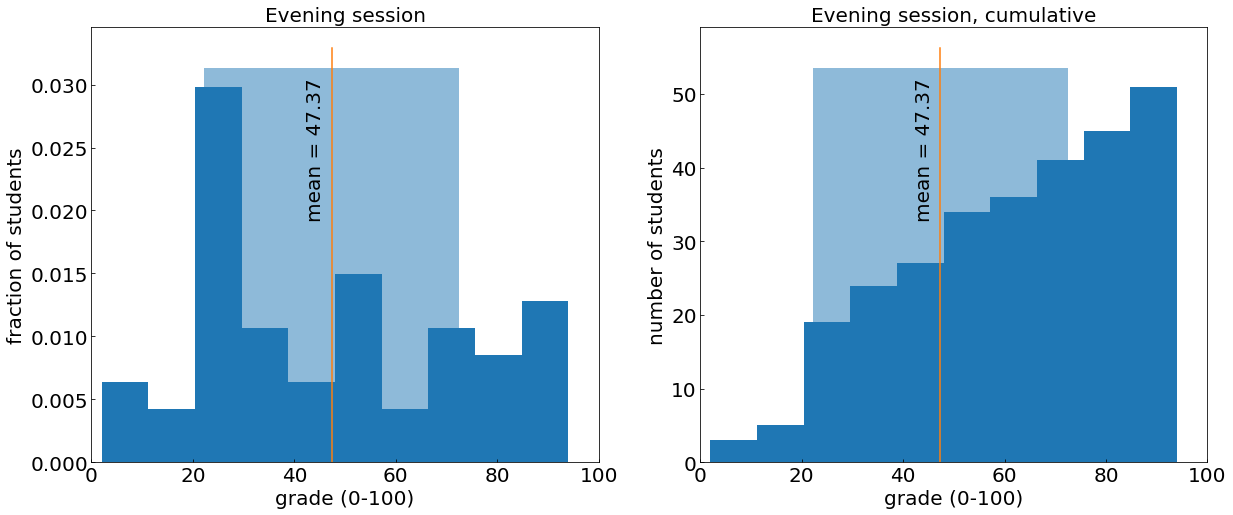

In [84]:
em, es, en = getstats(eve[[1]], "Evening session")

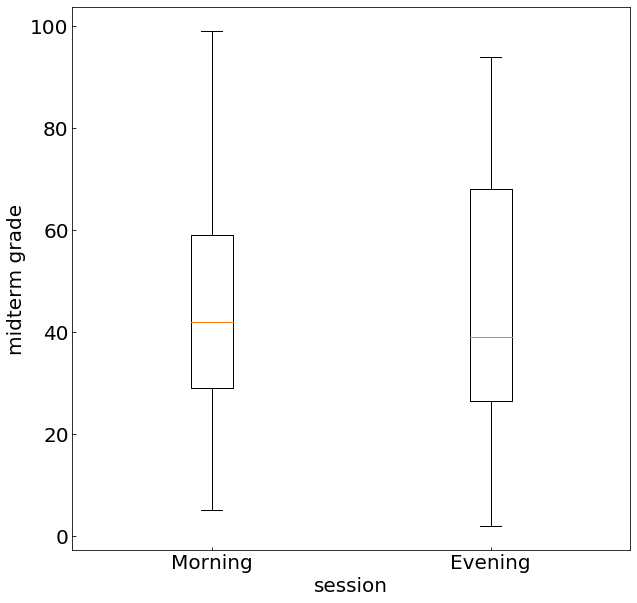

In [85]:
pl.figure(figsize=(10,10))
pl.boxplot([mor[[1]].values, eve[[1]].values]);
pl.xlabel("session", fontsize=20)
pl.xticks([1,2], ["Morning", "Evening"], fontsize=20)
pl.ylabel("midterm grade", fontsize=20);

In [86]:
print("Morning session:\n" + 
      "number of students:   " + "below mean-stdev, below mean-1/2stdev, below mean\n" +
      "{0:30d} {1:15d} {2:15d}".format(
          (mor[1] < mm - ms).sum(), (mor[1] < mm - ms / 2).sum(), 
          (mor[1] < mm).sum()))

Morning session:
number of students:   below mean-stdev, below mean-1/2stdev, below mean
                             5              19              26


In [87]:
print("Morning session:\n" + 
      "fraction of students: " + "below mean-stdev, below mean-1/2stdev, below mean\n" +
      "{0:30.2f} {1:15.2f} {2:15.2f}".format(
    (mor[1] < mm - ms).sum() / mn, 
          (mor[1] < mm - ms / 2).sum() / mn, 
          (mor[1] < mm).sum() / mn))

Morning session:
fraction of students: below mean-stdev, below mean-1/2stdev, below mean
                          0.10            0.39            0.53


In [90]:
mor[mor[1] < mm - ms].to_csv("less1sM.csv")
mor[mor[1] < mm - ms/2].to_csv("less05sM.csv")
mor[mor[1] <= mm].to_csv("lessMeanM.csv")

In [88]:
print("Evening session:\n" + 
      "number of students:   " + "below mean-stdev, below mean-1/2stdev, below mean\n" +
      "{0:30d} {1:15d} {2:15d}".format(
          (eve[1] < em - es).sum(), 
           (eve[1] < em - es / 2).sum(), 
           (eve[1] < em).sum()))

Evening session:
number of students:   below mean-stdev, below mean-1/2stdev, below mean
                             6              20              27


In [89]:
print("Morning session:\n" + 
      "fraction of students: " + "below mean-stdev, below mean-1/2stdev, below mean\n" +
      "{0:30.2f} {1:15.2f} {2:15.2f}".format(
        (eve[1] < em - es).sum() / en, 
          (eve[1] < em - es / 2).sum() / en, 
          (eve[1] < em).sum() / en))

Morning session:
fraction of students: below mean-stdev, below mean-1/2stdev, below mean
                          0.12            0.39            0.53


In [91]:
eve[eve[1] < em - es].to_csv("less1sE.csv")
eve[eve[1] < em - es/2].to_csv("less05sE.csv")
eve[eve[1] <= em].to_csv("lessMeanE.csv")